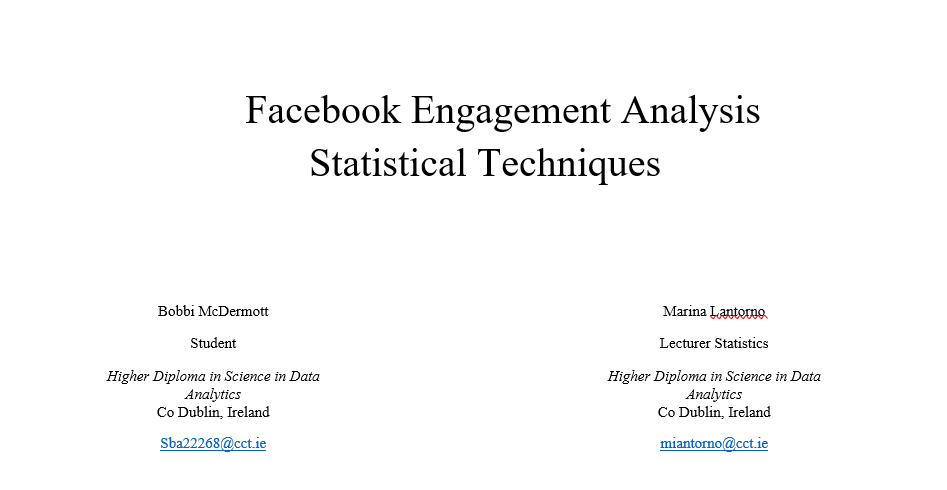

# Question 2

You are asked to work with the dataset “dataset_Facebook.csv”, which contains information on the
Facebook's page of a renowned cosmetics brand that change the owner recently. The name of the
company is omitted due to confidentiality issues. You are hired as a consultor to describe the
general scenario to the new owners, then you are required to:
- Determine the most common hour to create a post on the Facebook page.
- Identify the average number of comments, likes, and shares and compare the result.
- Calculate the percentage of each post type and indicate the category that has more posts.
- Calculate the percentage of posts per month.
- It is important to understand the audience to take actions in future. Determine whether there is a
significant variation in the lifetime engaged users.
- Calculate the number of likes reached by 50% of the sample. Identify the probability of finding up
to 15 posts with that number of likes in a sample of 25 posts.
- Determine what is the type of post with more interactions.
- In average, are there more posts from consumers or consumptions?
Prepare an executive summary with the information obtained from the above request 

## Import Libraries and Warning filter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import scipy.stats as stats
from statsmodels.stats import weightstats

In [3]:
import warnings
warnings.filterwarnings('ignore') 

## Facebook data

In [4]:
dff = pd.read_csv('dataset_Facebook.csv')

In [5]:
dff.tail()

,Page_total_likes,Type,Category,Post_Month,Post _Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime _Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
495,85093,Photo,3,1,7,2,0,4684,7536,733,708,985,4750,2876,392,5,53,26,84
496,81370,Photo,2,1,5,8,0,3480,6229,537,508,687,3961,2104,301,0,53,22,75
497,81370,Photo,1,1,5,2,0,3778,7216,625,572,795,4742,2388,363,4,93,18,115
498,81370,Photo,3,1,4,11,0,4156,7564,626,574,832,4534,2452,370,7,91,38,136
499,81370,Photo,2,1,4,4,0,4188,7292,564,524,743,3861,2200,316,0,91,28,119


## Question 2.1

**Determine the most common hour to create a post on the Facebook page**

In [6]:
mode = dff['Post_Hour'].mode()
print(mode)

0    3
Name: Post_Hour, dtype: int64


<font color = blue> ANSWER = **3**

## Question 2.2

**Identify the average number of comments, likes, and shares and compare the result**

In [7]:
cols = ['comment', 'like','share']

dfmean = dff[cols].mean()

In [8]:
dfmean.head()

comment      7.482
like       177.990
share       27.058
dtype: float64

In [9]:
# list of strings
lst = ['comment','like','share']
  
# list of int
lst2 = [7.482, 117.990, 27.058,]
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Socials', 'Mean'])
df

,Socials,Mean
0,comment,7.482
1,like,117.990
2,share,27.058


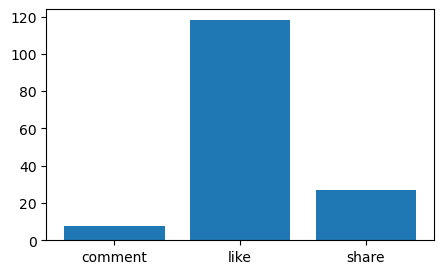

In [10]:

from matplotlib import pyplot as plt

 
Socials = df['Socials']
Mean = df['Mean']
 
# Figure Size
fig = plt.figure(figsize =(5, 3))
 
# Horizontal Bar Plot
plt.bar(Socials[0:3], Mean[0:3])
 
# Show Plot
plt.show()

<font color = blue> ANSWER   
<font color = blue> **No1: Like**  
<font color = blue> **No2: Share**  
<font color = blue> **No3: Comment**  

## Question 2.3

**Calculate the percentage of each post type and indicate the category that has more posts**

In [11]:
dff["Type"].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [12]:
dff["Type"].count()

500

In [13]:
dff["Type"].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [14]:
photo = 426 / 500

photo_percent = photo * 100

status = 45 / 500

status_percent = status * 100

link = 22 / 500

link_percent = link * 100

video = 7 / 500

video_percent = video * 100

In [15]:
video_percent

1.4000000000000001

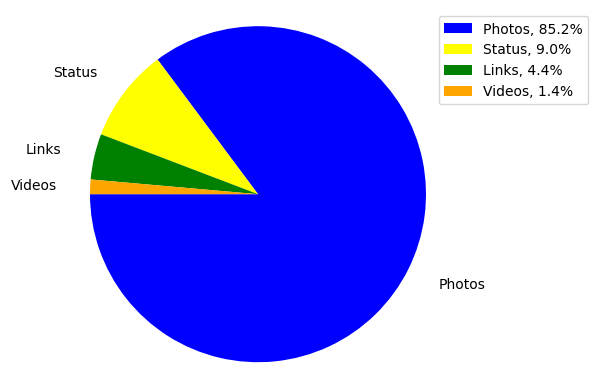

In [16]:
import matplotlib.pyplot as plt

labels= ['Photos', 'Status', 'Links', 'Videos']

colors=['blue', 'yellow', 'green', 'orange']

sizes= [photo_percent, status_percent, link_percent, video_percent]

plt.pie(sizes,labels=labels, colors=colors, startangle=180, pctdistance=1, labeldistance=1.2)

labels = [f'{l}, {s:1.1f}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.axis('equal')

plt.show()


<font color = blue> Answer  
**Photos = 85.2%**  
**Status = 9%**  
**Links = 4.4%**  
**Videos = 1.4%**  

## Question 2.4

**Calculate the percentage of posts per month**

In [17]:
dff["Post_Month"].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [18]:
values = dff['Post_Month'].value_counts()
print(values)

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post_Month, dtype: int64


In [19]:
values = dff['Post_Month'].value_counts()

totals = dff['Post_Month'].count()

frequency = values/totals * 100

print(frequency)

10    12.0
7     10.4
12    10.0
4     10.0
6      9.8
11     9.0
5      7.4
9      7.2
3      7.2
8      6.8
2      5.2
1      5.0
Name: Post_Month, dtype: float64


Text(0, 0.5, 'Percentage')

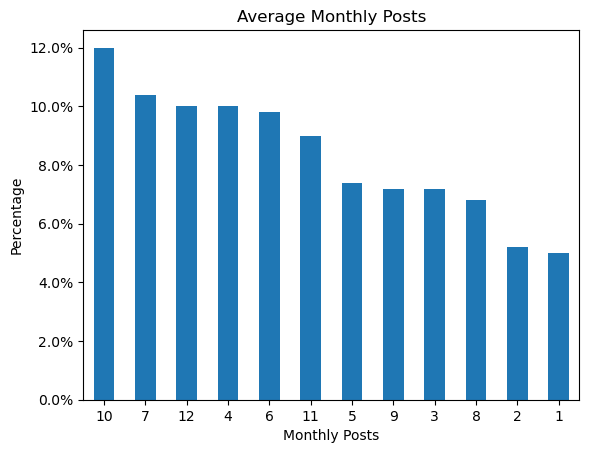

In [20]:
import matplotlib.ticker as mtick

ax = frequency.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Average Monthly Posts")
plt.xlabel("Monthly Posts")
plt.xticks(rotation=0)
plt.ylabel("Percentage")

<font color = blue> Answer  
**10 Posts    12%**  
**7 Posts     10.4%**
**12 Posts    10.0%**  
**4 Posts     10.0%**  
**6 Posts     9.8%**
**11 Posts    9.0%**
**5 Posts     7.4%**  
**9 Posts     7.2%**  
**3 Posts     7.2%**  
**8 Posts     6.8%**  
**2 Posts     5.2%**  
**1 Posts     5.0%**

## Question 2.5

**It is important to understand the audience to take actions in future. Determine whether there is a
significant variation in the lifetime engaged users**

<font color = blue> In statistics, variance measures variability from the average or mean. It is calculated by taking the differences between each number in the data set and the mean, then squaring the differences to make them positive, and finally dividing the sum of the squares by the number of values in the data set

    
**The variance is the average of the squared deviations from the mean, i.e., var = mean(x) , where x = abs(a - a. mean())**2 . The mean is typically calculated as x. sum() / N , where N = len(x)**

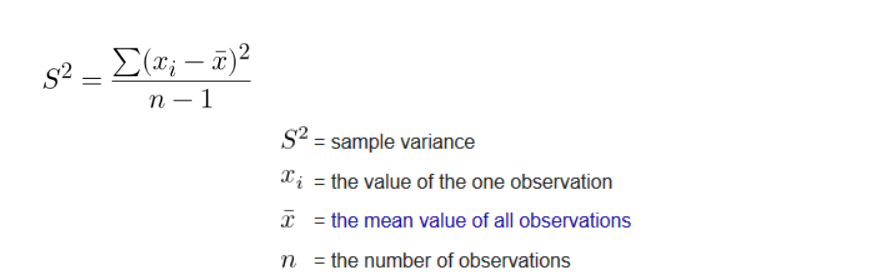

In [21]:
print(dff.var()['Lifetime_Engaged_Users'])

970752.9309619239


In [22]:
dff['Lifetime_Engaged_Users'].to_string

<bound method Series.to_string of 0       178
1      1457
2       177
3      2211
4       671
       ... 
495     733
496     537
497     625
498     626
499     564
Name: Lifetime_Engaged_Users, Length: 500, dtype: int64>

In [23]:

Mean = dff['Lifetime_Engaged_Users'].mean()
n=500

dev = dff["Lifetime_Engaged_Users"] = dff["Lifetime_Engaged_Users"].apply(lambda x :x - Mean)

dev2= np.square(dev)

data = np.array(dev2)

sum = data.sum()

variance = sum/(n-1)
print(variance)


970752.9309619238


In [24]:
import math 
  

standard_deviation =(math.sqrt(variance)) 
print(standard_deviation)

985.2679488149017


<font color = blue> Answer  
**Variance = 970752.9309619238**  
**Standard Deviation = 985.2679488149017**  

## Question 2.6

**Calculate the number of likes reached by 50% of the sample. Identify the probability of finding up
to 15 posts with that number of likes in a sample of 25 posts**

Discrete Random Probability

In [25]:
dff['like'].describe()

count     500.000000
mean      177.990000
std       323.076038
min         0.000000
25%        56.750000
50%       101.000000
75%       188.000000
max      5172.000000
Name: like, dtype: float64

In [26]:
dfmedian = dff['like'].median()

In [27]:
print(dfmedian)

101.0


In [28]:
dfmax = dff['like'].max()

In [29]:
print(dfmax)

5172


In [30]:
d = dff[['like']].values.tolist()


In [31]:
import random

r = (random.choices((d), k=25))

In [32]:
print(r)

[[1505], [234], [32], [360], [117], [529], [56], [193], [286], [155], [0], [664], [146], [51], [80], [14], [61], [194], [155], [1639], [2], [5172], [187], [76], [159]]


In [33]:
random =[236, 35, 187, 62, 71, 164, 154, 325, 268, 249, 331, 163, 955, 53, 107, 86, 104, 
         113, 256, 94, 89, 47, 57, 154, 71]

In [34]:
x = [i for i in random if i>101]
#value of x
len(x)

15

There are 15 values in this set that are 101 or over

In [35]:
Probability = 15/25*100
print(Probability)

60.0


In [36]:
Probability15 = ((60*60)/100)
print(Probability15)

36.0


<font color = blue> Answer  
**36%**

## Question 2.7

**Determine what is the type of post with more interactions**

In [37]:
df2= dff[['Type','Total_Interactions']]

In [38]:
df2.head()

,Type,Total_Interactions
0,Photo,100
1,Status,164
2,Photo,80
3,Photo,1777
4,Photo,393


In [39]:
df_grouped = df2.groupby(by="Type")["Total_Interactions"].sum()

df_grouped.head()


Type
Link       1959
Photo     92263
Status     9767
Video      2071
Name: Total_Interactions, dtype: int64

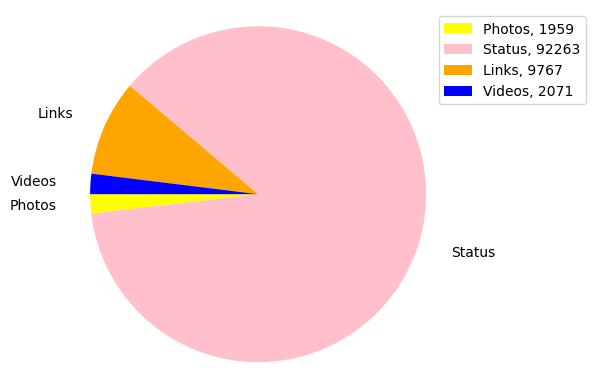

In [40]:
Link = 1959
Photo = 92263
Status = 9767
Video = 2071


labels= ['Photos', 'Status', 'Links', 'Videos']

colors=['yellow', 'pink', 'orange', 'blue']

sizes= [Link, Photo, Status, Video]

plt.pie(sizes,labels=labels, colors=colors, startangle=180, pctdistance=1, labeldistance=1.2)

labels = [f'{l}, {s:1.0f}' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


plt.axis('equal')

plt.show()

In [41]:
total =  dff['Total_Interactions'].sum()

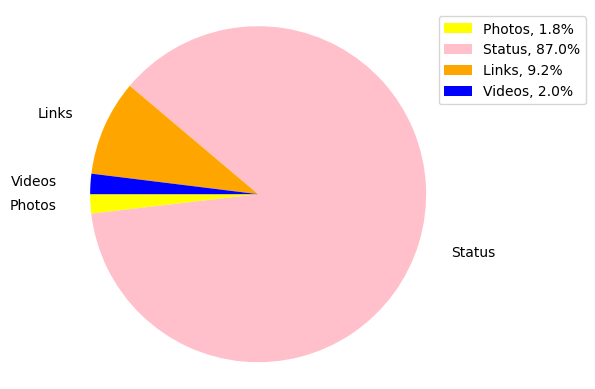

In [42]:
total =  dff['Total_Interactions'].sum()
Link_Perc = ((Link/total)*100)
Photo_Perc= ((Photo/total)*100)
Status_Perc = ((Status/total)*100)
Video_Perc = ((Video/total)*100)


labels= ['Photos', 'Status', 'Links', 'Videos']

colors=['yellow', 'pink', 'orange', 'blue']

sizes= [Link_Perc, Photo_Perc, Status_Perc, Video_Perc]

plt.pie(sizes,labels=labels, colors=colors, startangle=180, pctdistance=1, labeldistance=1.2)

labels = [f'{l}, {s:1.1f}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


plt.axis('equal')

plt.show()

<font color = blue>Answer  
**Status is the type with the highest Interactions**  
**Status = 87%**  
**Links = 9.2%**  
**Videos = 2%**    
**Photos = 1.8%**

## Question 2.8

**On average, are there more posts from consumers or consumptions?**

In [43]:
x = dff["Lifetime_Post_Consumers"].mean()

y  = dff["Lifetime_Post_Consumptions"].mean()


print(x, y)




798.772 1401.318


<BarContainer object of 2 artists>

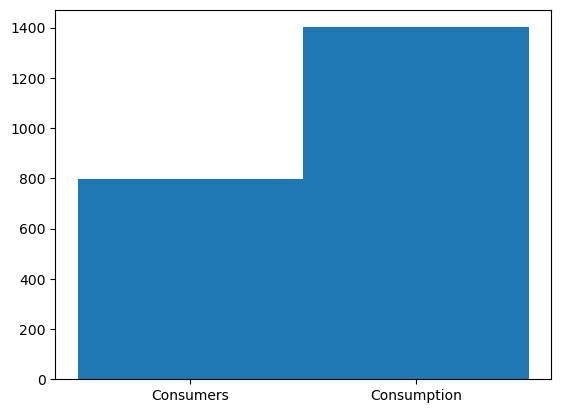

In [44]:
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()
ax.bar([1,2], [798.772, 1401.318], width=1,
       tick_label=['Consumers', 'Consumption'], align='center')

<font color = blue>Answer    
**On average, there are more posts from Consumptions rather than Consumers**  